# Test scVI

In [1]:
import sys
sys.path.append("snRNAseq/code")
from read_data import *
from run_harmony import *
from run_scVI import *
%load_ext autoreload
%autoreload 2 

## Double check scVI outputs

## Local CPU testing

In [ ]:
# sys.executable
# !/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/bin/pip install --user harmonypy

'/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/bin/python'

In [ ]:
# adata = sc.read_h5ad("snRNAseq/outputs/velmeshev100k-wang50k_pcs20/velmeshev100k-wang50k.h5ad")
# adata_10k = read_velmeshev("snRNAseq/data/velmeshev10k.h5ad")

/rds/user/rajd2/hpc-work/snRNAseq/code/read_data.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .assign(Pseudotime_pct = lambda x: x.groupby('Cell_Class')['Pseudotime'].apply(lambda y: y*100/y.max()).reset_index(0, drop=True)) #
/rds/user/rajd2/hpc-work/snRNAseq/code/read_data.py:76: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .assign(tissue = lambda x: x['tissue'].replace({


First run Harmony integration on test dataset

In [4]:
velmeshev_path = "snRNAseq/data/velmeshev10k.h5ad"

h5ad_reading_functions = [
    read_velmeshev,
    # read_dataset3, # Add if you have dataset3 and its reading function
]

# List of all input .h5ad file paths to process
input_files_to_process = [velmeshev_path]
# input_files_to_process = [velmeshev_path, wang_path, dataset3_path] # Example for 3 files

# Output settings
output_base_dir = "snRNAseq/outputs" # A top-level directory for your results
run_name = "velmeshev10k" # A unique name for this specific run
output_specific_dir = os.path.join(output_base_dir, run_name)
output_h5ad_filename = f"{run_name}.h5ad"

integrated_adata = integrate_snrnaseq_harmony(
            input_h5ad_paths=input_files_to_process,
            reading_functions=h5ad_reading_functions, # Now a list
            output_dir=output_specific_dir,
            output_filename=output_h5ad_filename
)

Step 1: Loading and concatenating data...
  Reading snRNAseq/data/velmeshev10k.h5ad using read_velmeshev...


/rds/user/rajd2/hpc-work/snRNAseq/code/read_data.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .assign(Pseudotime_pct = lambda x: x.groupby('Cell_Class')['Pseudotime'].apply(lambda y: y*100/y.max()).reset_index(0, drop=True)) #
/rds/user/rajd2/hpc-work/snRNAseq/code/read_data.py:76: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .assign(tissue = lambda x: x['tissue'].replace({


  Converted .raw to .X for primary operations.
Combined data dimensions: (9791, 17663)

--- .obs columns in concatenated data ---
['organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'sample', 'dataset', 'region', 'PMI', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'chemistry', 'lineage', 'age_years', 'age_log2', 'region_broad', 'origin']
------------------------------------------

Step 2: Performing basic QC and generating diagnostic plots...


/rds/user/rajd2/hpc-work/snRNAseq/code/run_harmony.py:158: UserWarning: No mitochondrial genes found with prefix 'MT-'. Skipping %MT calculation.
  warnings.warn(f"No mitochondrial genes found with prefix '{mt_gene_prefix}'. Skipping %MT calculation.")


  QC plots saved to snRNAseq/outputs/velmeshev10k/pre_integration_qc_plots.png

Step 3: Preprocessing data using Pearson residuals...


2025-06-06 15:52:58,001 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


  Data now contains `X_pca` based on Pearson residuals with 20 components.

Step 4: Integrating data with Harmony using 'chemistry' as batch key...


2025-06-06 15:52:59,507 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-06-06 15:52:59,535 - harmonypy - INFO - Iteration 1 of 30
2025-06-06 15:53:00,666 - harmonypy - INFO - Iteration 2 of 30
2025-06-06 15:53:01,750 - harmonypy - INFO - Iteration 3 of 30
2025-06-06 15:53:02,833 - harmonypy - INFO - Iteration 4 of 30
2025-06-06 15:53:03,921 - harmonypy - INFO - Iteration 5 of 30
2025-06-06 15:53:05,015 - harmonypy - INFO - Iteration 6 of 30
2025-06-06 15:53:06,088 - harmonypy - INFO - Iteration 7 of 30
2025-06-06 15:53:07,177 - harmonypy - INFO - Iteration 8 of 30
2025-06-06 15:53:08,309 - harmonypy - INFO - Iteration 9 of 30
2025-06-06 15:53:09,366 - harmonypy - INFO - Iteration 10 of 30
2025-06-06 15:53:10,519 - harmonypy - INFO - Iteration 11 of 30
2025-06-06 15:53:11,642 - harmonypy - INFO - Iteration 12 of 30
2025-06-06 15:53:12,434 - harmonypy - INFO - Iteration 13 of 30
2025-06-06 15:53:13,262 - harmonypy - INFO - Iteration 14 of 30
2025-06-06 15:53:13,824 - ha

  Harmony integration complete. Integrated embedding in `data.obsm['X_harmony']`.

Step 5: Computing neighbors and UMAP...


2025-06-06 15:53:51.815161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749221632.545779 1324676 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749221632.709475 1324676 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


  UMAP embedding computed and stored in `data.obsm['X_umap']`.

Step 6: Performing Leiden clustering...


/rds/user/rajd2/hpc-work/snRNAseq/code/run_harmony.py:248: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data, random_state=random_state, key_added='leiden_clusters')


  Leiden clustering complete. Clusters in `data.obs['leiden_clusters']`.

Step 7: Saving integrated AnnData object to snRNAseq/outputs/velmeshev10k/velmeshev10k.h5ad...
  AnnData object saved successfully.

Step 8: Generating UMAP plots...
  UMAP plots saved to snRNAseq/outputs/velmeshev10k/integrated_harmony_umaps.png.

Pipeline complete.


In [11]:
adata_harmony = sc.read_h5ad(os.path.join(output_specific_dir, output_h5ad_filename))

Then take Harmony integrated data and run scVI

In [43]:
output_base_dir = "snRNAseq/outputs" # A top-level directory for your results
run_name = "velmeshev10k" # A unique name for this specific run
output_specific_dir = os.path.join(output_base_dir, run_name)
output_filename = f"{run_name}_scvi.h5ad"

adata_scvi = integrate_snrnaseq_scvi(adata_harmony, 
                        output_dir=output_specific_dir, 
                        output_filename=output_filename,
                        max_epochs_scvi=3, 
                        max_epochs_scanvi=3)                        

Seed set to 42



--- scVI/scANVI Integration Pipeline ---
CUDA not available. Using CPU.
  Original 'X_umap' (from Harmony) copied to 'X_umap_harmony' for preservation.

Step 1: Preparing AnnData for scVI...
  'counts' layer already exists. Using existing raw counts.
  Using 3000 highly variable genes for training.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=75` in the `DataLoader` to improve performance.
/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=75` in the `DataLoader` to improve performance.


  Setting up AnnData for scVI...
  AnnData setup for scVI complete.

Step 2: Training SCVI model...
  SCVI model initialized with n_latent=30, n_hidden=128, n_layers=2.
  Training SCVI for 3 epochs...
Epoch 3/3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.24s/it, v_num=1, train_loss_step=1.85e+3, train_loss_epoch=1.83e+3]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 3/3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.26s/it, v_num=1, train_loss_step=1.85e+3, train_loss_epoch=1.83e+3]
  SCVI model saved to snRNAseq/outputs/velmeshev10k/scvi_model
  SCVI latent representation (X_scVI) stored in adata.obsm with shape (9791, 30).
  Generating batch-corrected normalized expression from SCVI...
  SCVI normalized and batch-corrected expression (scvi_normalized) stored in adata.layers with shape (9791, 17663).

Step 3: Training scANVI model using 'lineage' as cell type key...
  AnnData setup for scANVI complete.
  scANVI model initialized.
  Training scANVI for 3 epochs...
INFO     Training for 3 epochs.                                                                                    


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=75` in the `DataLoader` to improve performance.
/opt/micromamba/envs/scvi-scgen-scmomat-unitvelo/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=75` in the `DataLoader` to improve performance.


Epoch 3/3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.38s/it, v_num=1, train_loss_step=1.85e+3, train_loss_epoch=1.83e+3]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 3/3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.39s/it, v_num=1, train_loss_step=1.85e+3, train_loss_epoch=1.83e+3]
  scANVI model saved to snRNAseq/outputs/velmeshev10k/scanvi_model
  scANVI latent representation (X_scANVI) stored in adata.obsm with shape (9791, 30).
  Generating batch-corrected normalized expression from scANVI...
  scANVI normalized and batch-corrected expression (scanvi_normalized) stored in adata.layers with shape (9791, 17663).

Step 4: Computing UMAP for scVI and scANVI latent spaces...
  UMAP for scVI latent space computed and stored in `adata.obsm['X_umap_scvi']`.
  Generating plots for scVI UMAP...
  Temporarily set adata.obsm['X_umap'] to 'X_umap_scvi' for plotting.
  Set custom ticks for 'age_log2' colorbar.
  UMAP plots for X_umap_scvi saved to snRNAseq/outputs/velmeshev10k/integrated_scvi_umaps.png.
  Restored original adata.obsm[

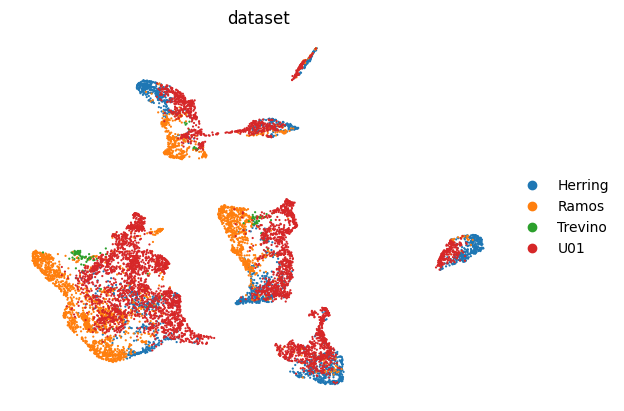

In [ ]:
sc.pl.umap(adata_scvi, color='dataset', neighbors_key='', frameon=False, wspace=0.4, hspace=0.4, ncols=3, size=10)